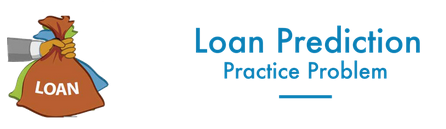

**Compañía:** Waku Casa de Software

**Data Scientist:** Antonio Boza

**OBJETIVO:** Este proyecto tiene como objetivo elaborar y entrenar un modelo de Machine Learning para determinar si una persona es aceptada o no para acceder a un crédito en la plataforma Blockchain de préstamos.

**PLANTEAMIENTO DEL PROBLEMA:**
Se requiere elaborar una solución con aprendizaje automático (Machine Learning) para la predicción en línea del riesgo financiero y la determinación de aprobación de créditos a personas naturales y/o jurídicas.

**FACTORES:**

Los factores que pueden afectar la aprobación de un crédito son los siguientes:

**Salario:** los aplicantes con mayor salario tendrán mayor probabilidad de ser aprobados.

**Historial:** aplicantes que hayan obtenido crédito y lo hayan pagado, tendrán más probabilidad de ser aprobados.

**Monto_préstamo:** mientras más bajo el monto del crédito, más posibilidad de ser aprobado.

**Tiempo_préstamo:** mientras menor sea el periodo para pagar, mayor será la probabilidad de ser aprobado.

**EMI:** mientras menor sea el monto mensual a pagar, mayor el chance de ser aprobado.


**PLANTEAMIENTO DE LA SOLUCIÓN:** Se realizará el análisis de datos obtenidos del sitio web https://datahack.analyticsvidhya.com/ para luego utilizarla en el entrenamiento del modelo empleando el algoritmo de regresión logística y aplicarlo a datos reales que serán introducidos en línea desde una app web.

## Importamos los paquetes requeridos

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importamos la data de entrenamiento y de prueba

In [373]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

### Revisión de la data

In [374]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [375]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [376]:
train['LoanAmount'].min()

9.0

In [377]:
train['LoanAmount'].max()

700.0

In [378]:
train['Loan_Amount_Term'].min()

12.0

In [379]:
train['Loan_Amount_Term'].max()

480.0

In [380]:
train_original = train.copy()
test_original = test.copy()

In [381]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [382]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Se pueden observar en el dataset "train" 12 columnas independientes y 1 dependiente (Loan_Status"). Esta es la que vamos a predecir.

En el set de pruebas (test) tenemos sólo las 12 columnas independientes sin la columna target.

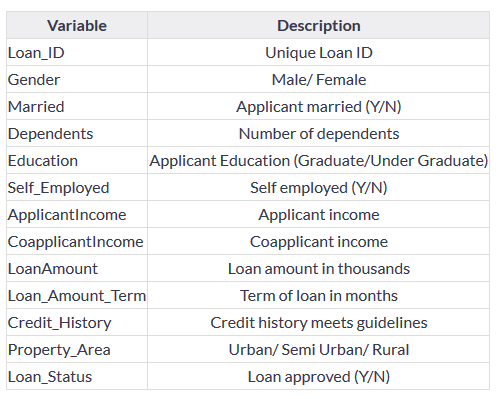

In [383]:
train['LoanAmount'].min()

9.0

Verificamos el tipo de datos en el set "train"

In [384]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [385]:
train.shape

(614, 13)

In [386]:
test.shape

(367, 12)

### Análisis de la variable objetivo "Loan_Status" 

In [387]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

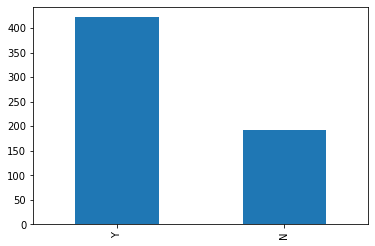

In [388]:
train['Loan_Status'].value_counts().plot.bar()

Se puede observar que 422 personas (69%) de un total de 614 recibieron aprobación del crédito

### Análisis de variables independientes (Categorical)

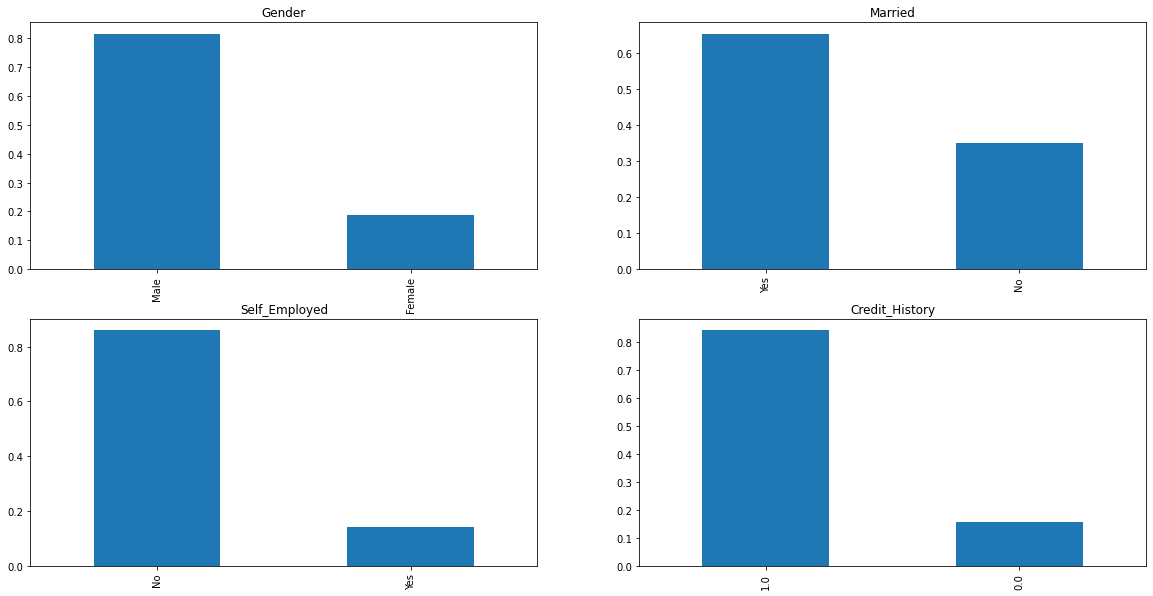

In [389]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit_History')
plt.show()

**Se puede inferir de los gráficos de arriba:**

    *80% de los aplicantes son hombre
    *Cerca del 65% de los aplicantes son casados
    *Cerca del 15% de los aplicantes trabajan por su cuenta 
    *Cerca del 85% de los aplicantes han pagado antes sus créditos

### Análisis de variables independientes (Ordinales)

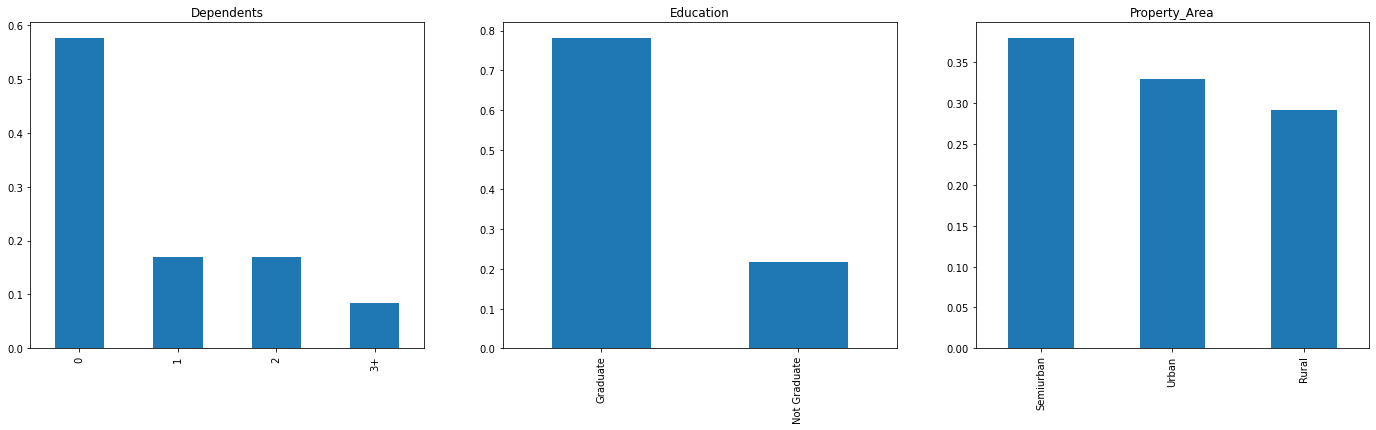

In [390]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

**Se puede inferir de los gráficos de arriba:**


    *La mayoría de los aplicantes no tienen personas dependientes
    *Cerca del 80% de los aplicantes son graduados
    *La mayoría de los aplicantes viven en zonas semiurbanas    

### Análisis de variables independientes (Numéricas)

### Revisemos la distribución del ingreso de los aplicantes

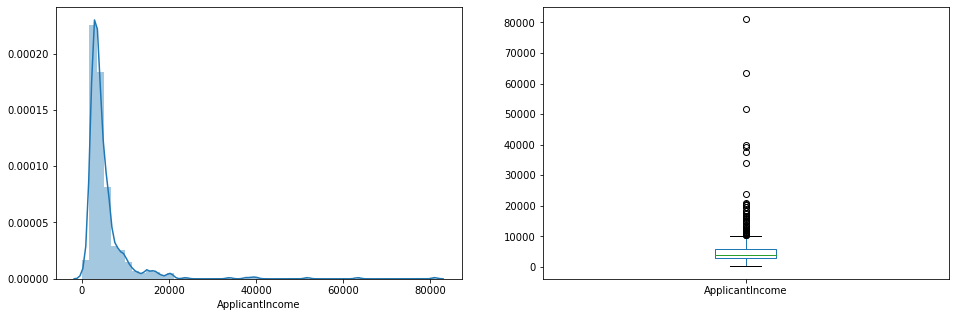

In [391]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Se puede inferir del gráfico de distribución que los datos no tienen forma "normalizada". Más adelante tendremos que trabajar esto y hacer que tiendan a la forma Gaussiana o normal, que es con la cual los algoritmos funcionan mejor.

También se observa en el gráfico de caja que existen algunos datos atípicos (outliers) los cuales debemos tener en cuenta al momento de presparar los datos para entrenar el modelo.

Hagamos una revisión más detallada de los ingresos, segregando por "Education".
Se puede apreciar que los aplicantes graduados tienen los mayores ingresos y se pueden observar varios "outliers".

Text(0.5, 0.98, '')

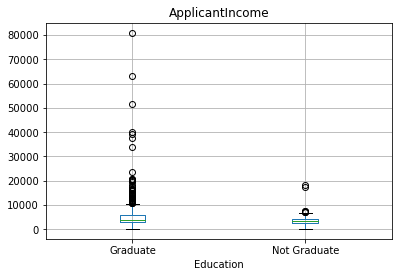

In [392]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")


**Los ingresos de los Co-aplicantes** tienen una distribución similar a la de los aplicantes principales. El rango de los ingresos aquí está entre 0 y 5000. (Ver próximos gráficos)

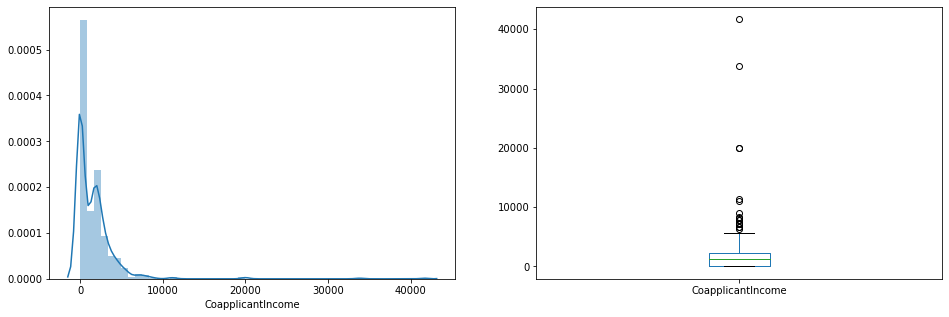

In [393]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

**Revisemos los montos del préstamo** (LoanAmount)

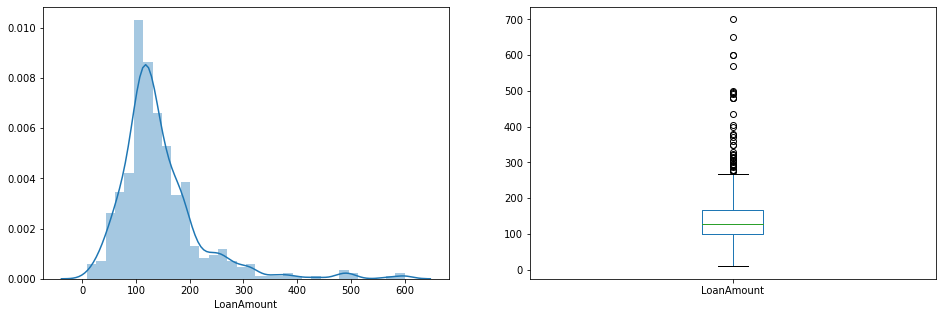

In [394]:
plt.figure(1) 
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

La distribución del monto del préstamo es bastante normal, sin embargo se pueden observar algunos outliers también. 

### Análisis variables independientes Vs variable target (Bivariate analysis)

**Premisas asumidas:**

    *los aplicantes con mayores ingresos tendrán mayor probabilidad de ser aprobados.

    *aplicantes que hayan obtenido crédito y lo hayan pagado, tendrán más probabilidad de ser aprobados.

    *mientras más bajo el monto del crédito, más posibilidad de ser aprobado.
    
    *mientras menor sea el monto mensual a pagar, mayor el chance de ser aprobado.


### Variables categóricas Vs target

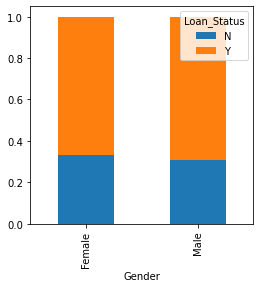

In [395]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4))

Podemos inferir que la proporción de hombres y mujeres de aprobados y no aprobados es aproximadamente igual.

Revisemos el resto de las variables categóricas Vs target (Loan_Status)

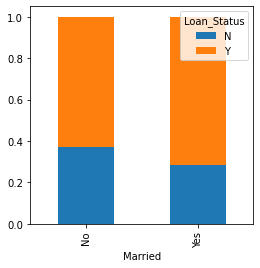

In [396]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4))

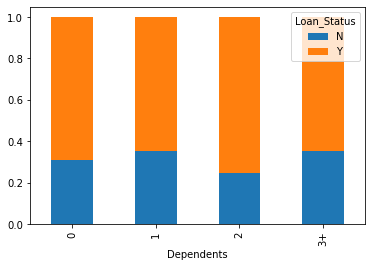

In [397]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

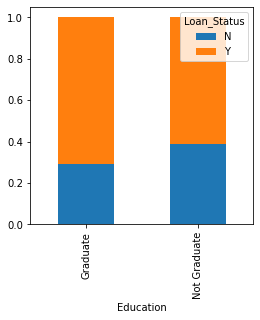

In [398]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4))

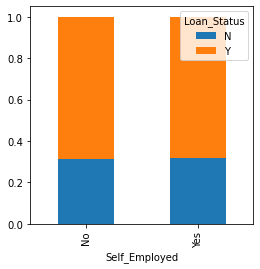

In [399]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4))

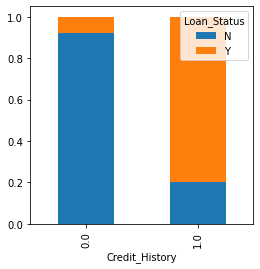

In [400]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4))

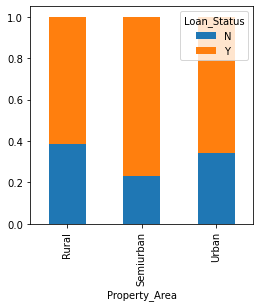

In [401]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4))

### Variables numéricas Vs target

Revisamos el promedio del ingreso de los aplicantes aprobados Vs el promedio de los no aprobados

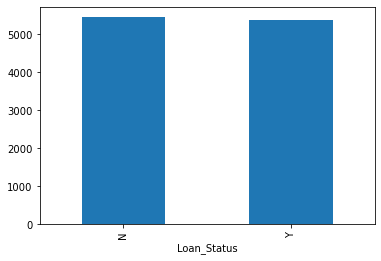

In [402]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Observamos que el promedio de ingresos es similar en ambos casos.
Por eso, vamos a subdividirlos o segmentarlos en varios grupos y analizamos las diferencias en esos subgrupos.

In [403]:
bins=[0,2500,4000,6000,81000]
group=['Bajo', 'Average', 'Alto', 'Muy alto']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins, labels=group)


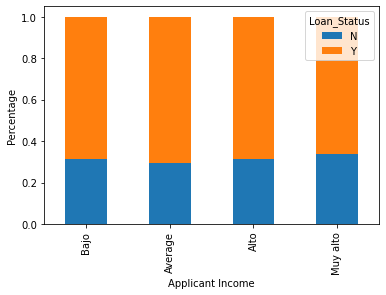

In [404]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')
plt.show()

Podemos inferir que el ingreso del aplicante no afecta la aprobación del crédito, lo que contradice una de nuestras premisas iniciales. Continúemos evaluanto, ahora el ingreso del Co-aplicante.

In [405]:
bins=[0,1000,3000,42000]
group=['Bajo', 'Average', 'Alto']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins, labels=group)

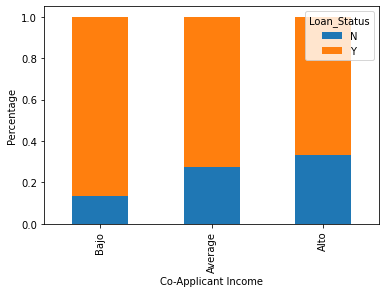

In [406]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Co-Applicant Income')
plt.ylabel('Percentage')
plt.show()

Se puede inferir que mientras el ingreso del co-aplicante es menor, resulta mayor la probabilidad de ser aprobado. Esto puede deberse a que muchos aplicantes no tienen co-aplicantes, por lo que ese monto sería igual a cero.

Probemos combinando en una sóla variable los ingresos de aplicante + co-aplicante.

In [407]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [408]:
bins=[0,2500,4000,6000,81000]
group=['Bajo', 'Average', 'Alto', 'Muy alto']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins, labels=group)

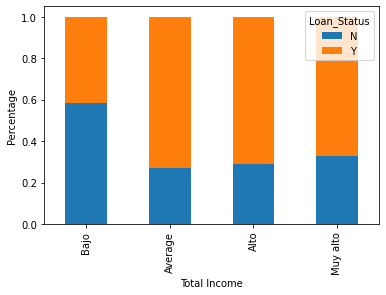

In [409]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

Podemos inferir que los aplicantes con monto de ingresos totales bajo tienen menos probabilidad de ser aprobados.

Visualicemos ahora la variable monto del crédito "LoanAmount".

In [410]:
bins=[0,100,200,700]
group=['Bajo', 'Average', 'Alto']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins, labels=group)

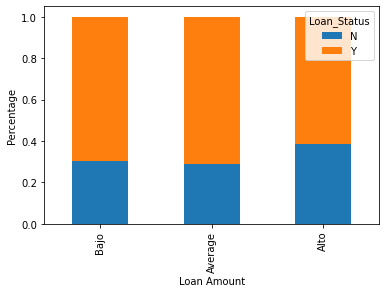

In [411]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

Puede observarse que la proporción de créditos aprobados es mayor para montos bajo y average.

Hagamos algunos ajustes a los segmentos creados arriba para la exploración de las variables categóricas y cambiemos "3+" por "3" para hacer esta variable numérica.

Convertiremos también la variable target "LoanStatus" de "Y" a "1" y "N" a "0". Así podremos validar la correlación con las variables independientes.

Vamos a quitar las columnas de segmentación de datos que creamos (bins)

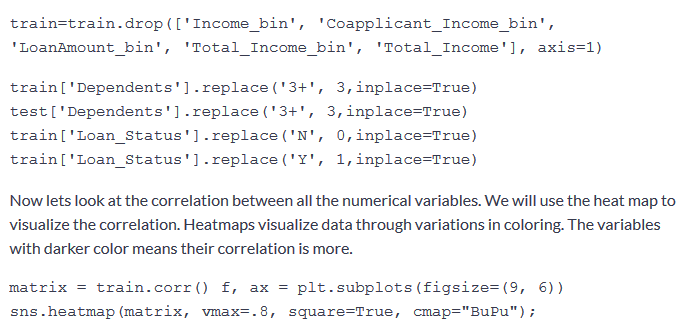

In [412]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Ahora revisaremos la correlación entre todas las variables numéricas

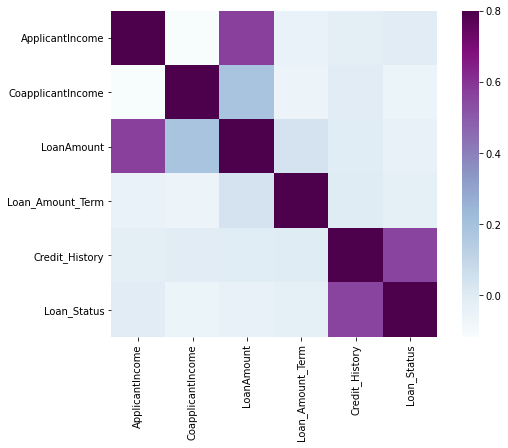

In [413]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

Del gráfico anterior inferimos que las variables con mayor correlación son:

    *ApplicantIncome - LoanAmount
    
    *Credit_History - Loan_Status



### Valores faltantes y atípicos - Tratamiento

In [414]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Los valores faltantes los trataremos según el siguiente abordaje:**

    *Valores numéricos: imputar usando el valor "promedio" (mean) o la "media" (median)
    
    *Variables categóricas imputar usando la "moda"
    
**Hay mucho menos valores faltantes en "Gender", "Married", "Dependents", "Credit_History" y "Self_Employed", así que podemos usar la moda en esas columnas o atributos (features).**

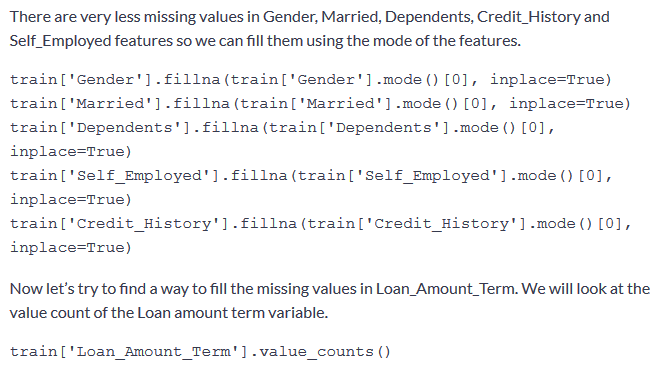

In [415]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

**Ahora tratemos los valores faltantes en la variable "Loan_Amount_Term"**

In [416]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**Se puede observar que el valor de "360" es el que más se repite, así que vamos a reemplazar los valores faltantes por ese valor (moda).**

In [417]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

**Ahora tratemos los valores faltantes en la variable numérica "LoanAmount"**

Por ser variable numérica podemos completar los valores faltantes con la media o el promedio. En este caso vamos a usar la media.

In [418]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

**Evaluemos si ya no hay ningún valor faltante en la dataset "train"**

In [419]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Realizamos el mismo tratamiento de valores faltantes en el dataset "test"**

In [420]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

**Realizamos la adecuación logarítmica a "LoanAmount" para que la distribución sea más normal**

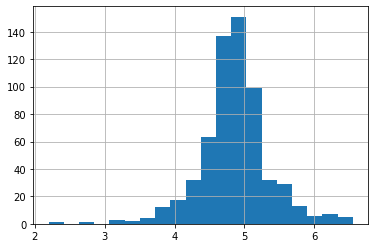

In [421]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

#Aplicamos también para el dataset "test"
test['LoanAmount_log'] = np.log(test['LoanAmount'])

### Métricas de evaluación

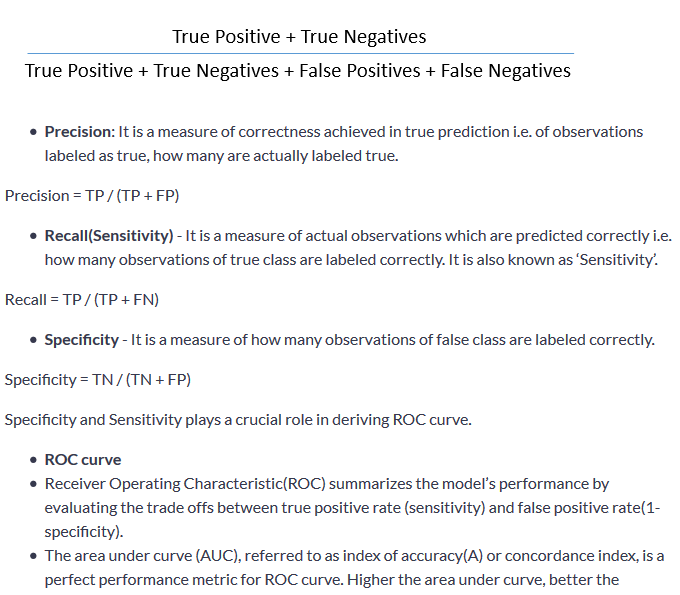

### Creación del modelo probando varios algoritmos

Crearemos un modelo de regresión logística, para lo cual tendremos que realizar unos ajustes previos a los datasets

In [422]:
# Quitamos la variable "Loan_ID" ya que no tiene ningún valor predictivo
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

Utilizaremos el paquete Sklearn para lo cual dividiremos el dataset en "X" (variables independientes) y "y" la variable a predecir (target)

In [423]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

**Crearemos "dummy variables" para las variables categóricas**

In [424]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

**Dividiremos el dataset "train" en dos para tener un subset de validación**

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
# x_cv y y_cv son los subsets para **Validación**
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

**Importamos desde sklearn LogisticRegression y accuracy_score**

In [427]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Creamos y entrenamos el modelo**

In [428]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Realizamos predicciones con el subset de validación**

In [429]:
# Predecimos el "Loan_Status" para calcular la "Accuracy"
pred_cv = model.predict(x_cv)

**Calculamos la precisión de nuestras predicciones accuracy_score con el dataset de validación**

In [430]:
accuracy_score(y_cv, pred_cv)

0.7837837837837838

**Hacemos predicciones y calculamos la precisión de nuestras predicciones accuracy_score con el dataset de test**

In [431]:
pred_test = model.predict(test)

**Importamos el archivo para sumisión**

In [432]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

In [433]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


**Sólo necesitamos enviar el "Loan_ID" y su respectivo "Loan_Status**

In [434]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

**Se requiere mostrar el "Loan_Status" como "Y" o "N", así que debemos reemplazar los "0" a "N" y los "1" a "Y"**

In [435]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

**Convertimos el dataframe a formato .csv para enviar las predicciones**

In [436]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logisticreg.csv')

### Validación usando K-Folds

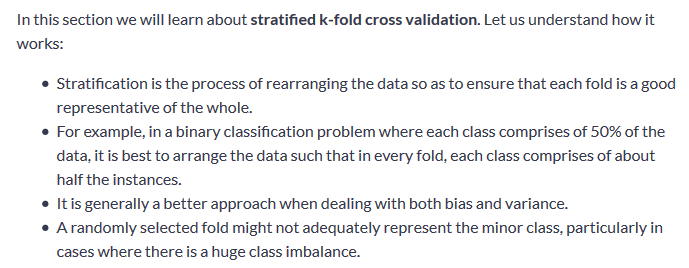

In [437]:
from sklearn.model_selection import StratifiedKFold

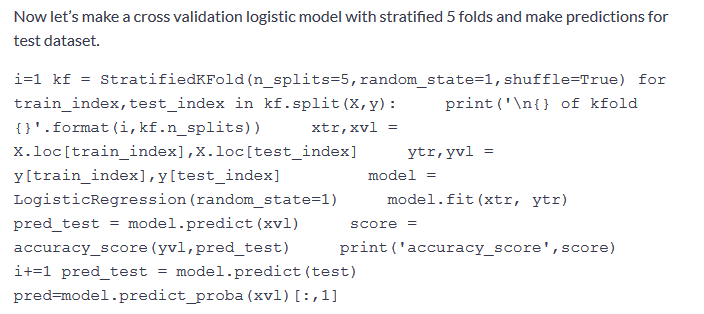

In [438]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kFold 5
accuracy_score 0.8048780487804879

2 of kFold 5
accuracy_score 0.8373983739837398

3 of kFold 5
accuracy_score 0.7804878048780488

4 of kFold 5
accuracy_score 0.7886178861788617

5 of kFold 5
accuracy_score 0.7950819672131147


**Visualicemos la curva ROC**

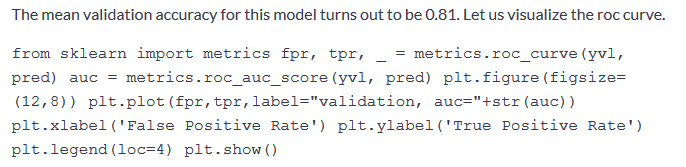

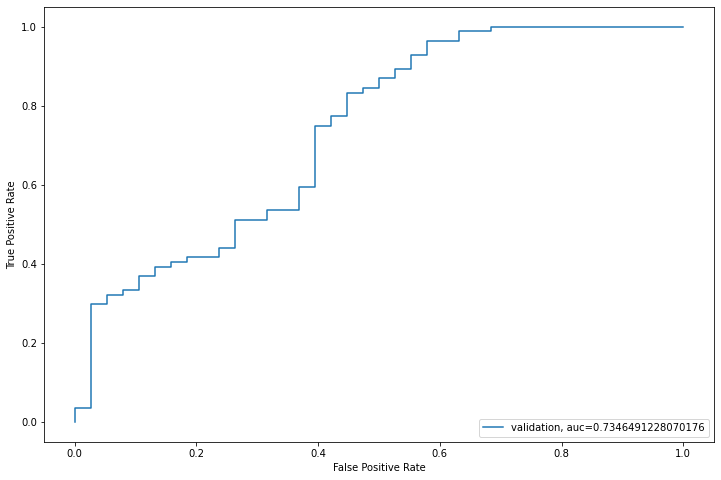

In [439]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label = "validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Se obtiene un valor auc de 0.73

In [440]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [441]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [442]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logisticreg.csv')

### Ingeniería de atributos (Feature Engineering)

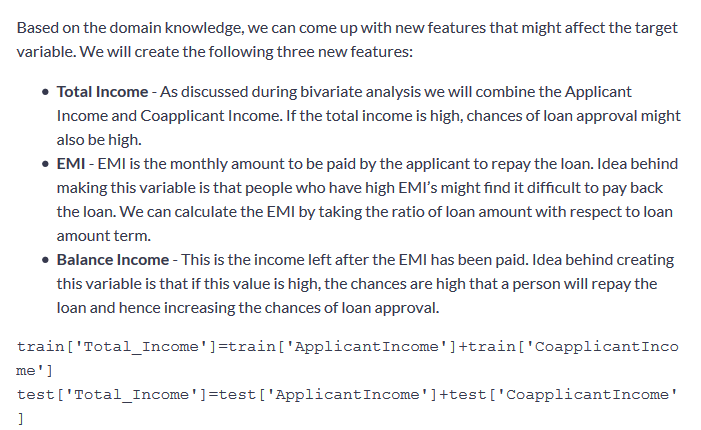

In [443]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

**Revisemos la distribución de esta nueva variable "Total_Income"**

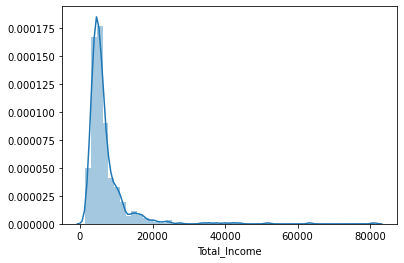

In [444]:
sns.distplot(train['Total_Income'])

Corregiremos la Kurtosis derecha aplicando la transformación logarítmica de forma tal que la nueva distribución sea más cercana a la normal y así minimizar el impacto de los datos extremos.

In [445]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

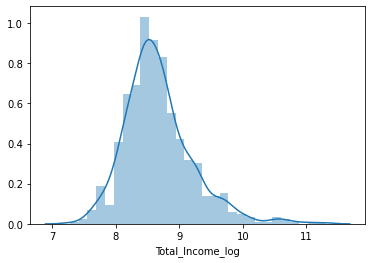

In [446]:
sns.distplot(train['Total_Income_log'])

**Creamos una nueva variable (atributo) "EMI"**

In [447]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

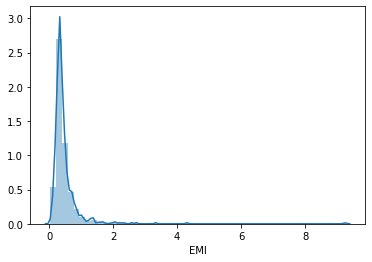

In [448]:
sns.distplot(train['EMI'])

**Creamos la variable (atributo) "Balance Income"**

In [449]:
train['Balance_Income'] = train['Total_Income']-(train['EMI']*1000)
# Multiplicamos por 1000 para hacer los montos similares 
test['Balance_Income'] = test['Total_Income']-(test['EMI']*1000)

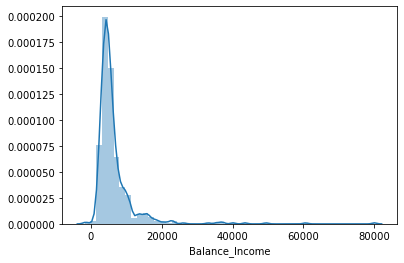

In [450]:
sns.distplot(train['Balance_Income'])

Ahora procedemos a eliminar las variables usadas para crear las nuevas

In [451]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

### Construir y entrenar de nuevo el modelo usando varios algoritmos
    *Logistic Regression
    *Decision Tree
    *Random Forest
    *XGBoost

### Logistic Regression

In [452]:
# Preparamos la data para el modelo

X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [453]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kFold 5
accuracy_score 0.7886178861788617

2 of kFold 5
accuracy_score 0.6910569105691057

3 of kFold 5
accuracy_score 0.6666666666666666

4 of kFold 5
accuracy_score 0.7804878048780488

5 of kFold 5
accuracy_score 0.680327868852459


### Decision Tree

In [454]:
from sklearn import tree

In [455]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kFold 5
accuracy_score 0.7398373983739838

2 of kFold 5
accuracy_score 0.6991869918699187

3 of kFold 5
accuracy_score 0.7560975609756098

4 of kFold 5
accuracy_score 0.7073170731707317

5 of kFold 5
accuracy_score 0.6721311475409836


### Random Forest

In [456]:
from sklearn.ensemble import RandomForestClassifier

In [457]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kFold 5
accuracy_score 0.8292682926829268

2 of kFold 5
accuracy_score 0.8130081300813008

3 of kFold 5
accuracy_score 0.7723577235772358

4 of kFold 5
accuracy_score 0.8048780487804879

5 of kFold 5
accuracy_score 0.7540983606557377


Tratemos de mejorar la precisión de este modelo haciendo ajustes a los hiperparámetros

In [458]:
from sklearn.model_selection import GridSearchCV

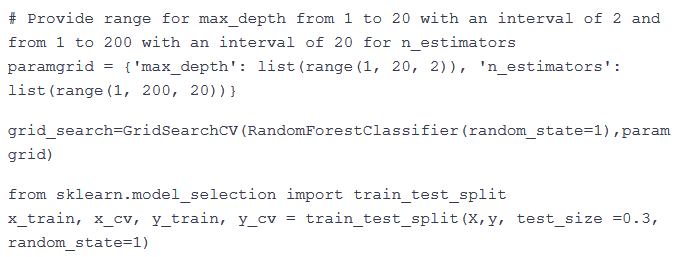

In [459]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [460]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

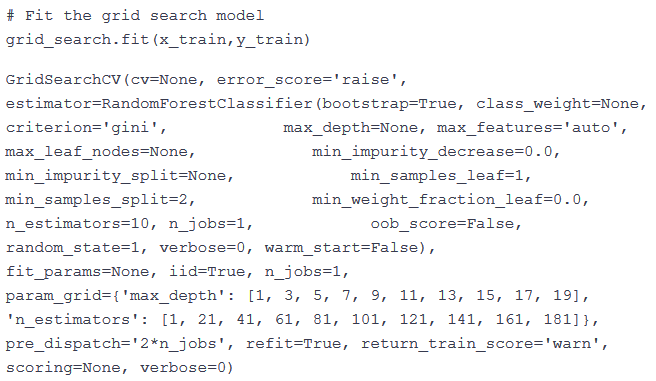

In [461]:
# Fit the grid search model
grid_search.fit(x_train, y_train)
GridSearchCV(cv=None, 
             error_score='raise', 
             estimator=RandomForestClassifier(bootstrap=True, 
                                              class_weight=None, 
                                              criterion='gini', 
                                              max_depth=None, 
                                              max_features='auto', 
                                              max_leaf_nodes=None, 
                                              min_impurity_decrease=0.0, 
                                              min_impurity_split=None, 
                                              min_samples_leaf=1, 
                                              min_samples_split=2, 
                                              min_weight_fraction_leaf=1, 
                                              n_estimators=10,
                                              n_jobs=1, 
                                              oob_score=False,
                                              random_state=1,
                                              verbose=0,
                                              warm_start=False), 
             #fit_params=None, 
             #iid=True, 
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]}, 
             pre_dispatch='2*n_jobs', 
             refit=True, 
             return_train_score='warn', 
             scoring=None, 
             verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=1,
                                              n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=1,
                                  

### Estimando los valores óptimos

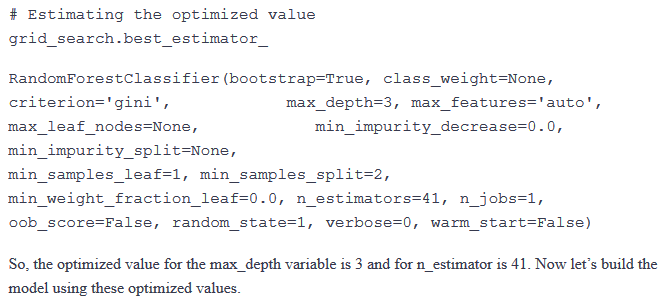

In [462]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True,
                       class_weight=None, 
                       criterion='gini', 
                       max_depth=None,
                       max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       n_estimators=41,
                       n_jobs=1,
                       oob_score=False,
                       random_state=1,
                       verbose=0,
                       warm_start=False)                                 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

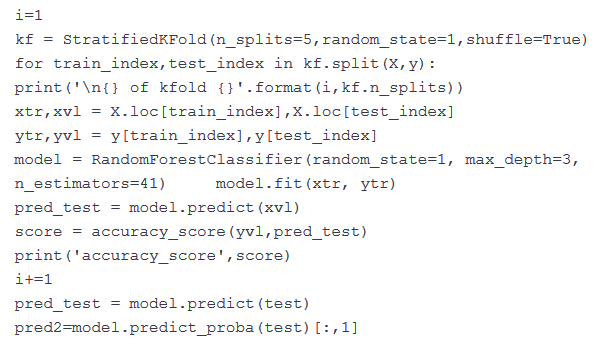

In [463]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]


1 of kFold 5
accuracy_score 0.8130081300813008

2 of kFold 5
accuracy_score 0.8455284552845529

3 of kFold 5
accuracy_score 0.8048780487804879

4 of kFold 5
accuracy_score 0.7967479674796748

5 of kFold 5
accuracy_score 0.7786885245901639


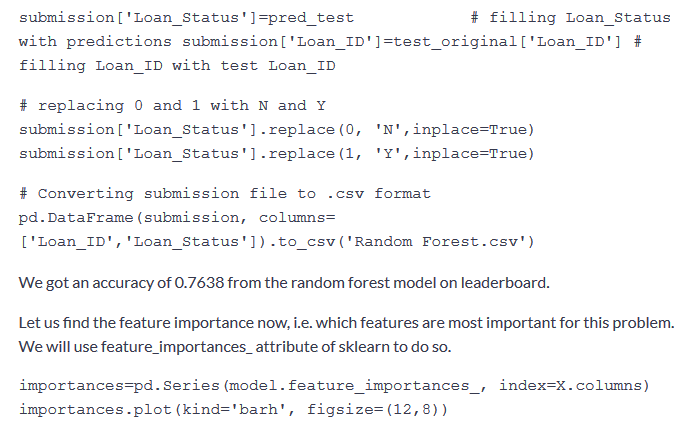

In [464]:
# Llenar el "Loan_Status" con predicciones
submission['Loan_Status'] = pred_test

# Llenar el "Loan_ID" con los test "Loan_ID"
submission['Loan_ID'] = test_original['Loan_ID']

# Reemplazar "0" y "1" con "N" y "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# Convertir a file ".csv" para enviar a competencia (https://courses.analyticsvidhya.com/)
# pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Random Forest.csv')

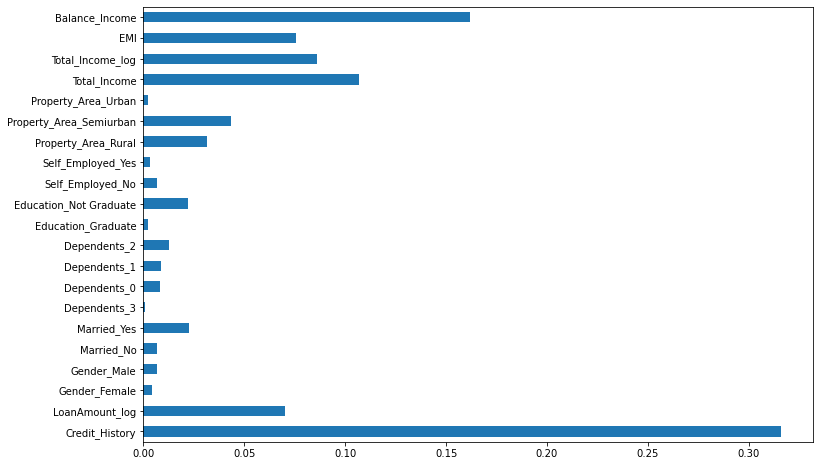

In [465]:
# Chequear la importancia de los atributos (features)
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

Podemos observar que los atributos más importantes son:

    *Credit_History
    *Balance_Income
    *Total_Income
    *EMI

### XGBOOST

Este es un algoritmo muy rápido y eficiente. Aquí debemos definir los siguientes hiperparámetros:

    *n_estimator: especifica el número de árboles (trees) para el modelo
    *max_depth: especifica la profundidad máxima de un árbol

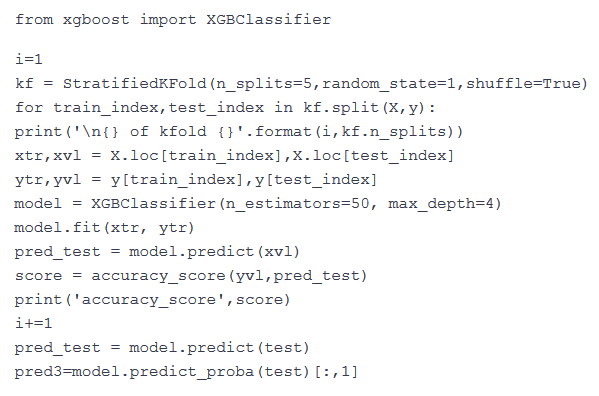

In [466]:
# pip install Xgboost

In [467]:
# from xgboost import XGBClassifier

# i=1
# kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# for train_index, test_index in kf.split(X,y):
    # print('\n{} of kFold {}'.format(i,kf.n_splits))
    # xtr,xvl = X.loc[train_index], X.loc[test_index]
    # ytr,yvl = y[train_index], y[test_index]
    # model = XGBClassifier(n_estimators=50, max_depth=4)
    # model.fit(xtr, ytr)
    # pred_test = model.predict(xvl)
    # score = accuracy_score(yvl, pred_test)
    # print('accuracy_score', score)
    # i+=1
    # pred_test = model.predict(test)
    # pred3 = model.predict_proba(test)[:,1]

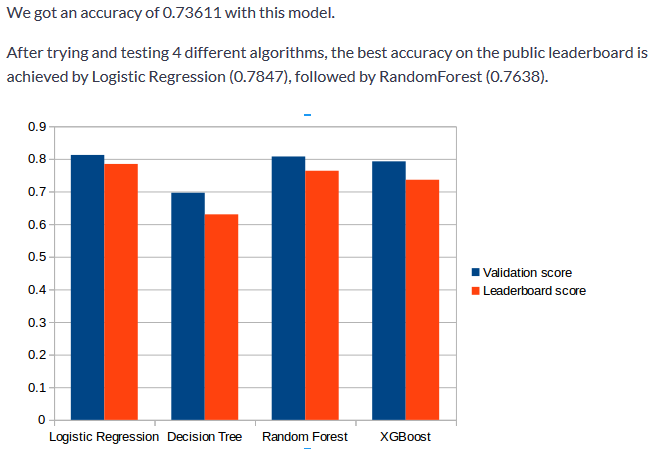

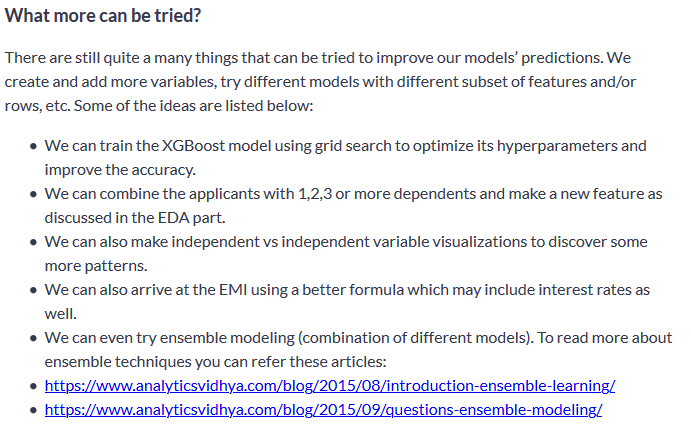

### Creación del modelo utilizando el paquete Pycaret

In [468]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [469]:
test.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.700480,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,5720,8.651724,0.305556,5414.444444
1,1.0,4.836282,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,4576,8.428581,0.350000,4226.000000
2,1.0,5.337538,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,6800,8.824678,0.577778,6222.222222
3,1.0,4.605170,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,4886,8.494129,0.277778,4608.222222
4,1.0,4.356709,0,1,1,0,0,1,0,0,...,1,1,0,0,0,1,3276,8.094378,0.216667,3059.333333


### Procedemos a eliminar las columnas de menor impacto en la prediccion

In [470]:
train = train.drop(['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Gender_Female', 'Gender_Male', 
                    'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate', 
                    'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'LoanAmount_log'], axis=1)
test = test.drop(['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban','Gender_Female', 'Gender_Male', 
                  'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate', 
                  'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'LoanAmount_log'], axis=1)


Los atributos más importantes son:


*Credit_History
*Balance_Income
*Total_Income
*Total_Income_log	
*EMI


In [471]:
train.head()

,Credit_History,Loan_Status,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,6000.0,8.699515,0.391667,5608.333333


In [472]:
test.head()

,Credit_History,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,5720,8.651724,0.305556,5414.444444
1,1.0,4576,8.428581,0.350000,4226.000000
2,1.0,6800,8.824678,0.577778,6222.222222
3,1.0,4886,8.494129,0.277778,4608.222222
4,1.0,3276,8.094378,0.216667,3059.333333


In [473]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [474]:
train['Balance_Income'].min()

-1768.0

In [475]:
train['Balance_Income'].max()

80000.0

In [476]:
train['Total_Income'].min()

1442.0

In [477]:
train['Total_Income'].max()

81000.0

In [478]:
train['EMI'].min()

0.025

In [479]:
train['EMI'].max()

9.25

In [480]:
train['Total_Income_log'].min()

7.273786317844895

In [481]:
train['Total_Income_log'].max()

11.302204433654575

In [482]:
data_seen = train
data_unseen = test

print('Data para Modelado: ' + str(data_seen.shape))
print('Data para Predicciones: ' + str(data_unseen.shape))

Data para Modelado: (614, 6)
Data para Predicciones: (367, 5)


In [483]:
from pycaret.classification import *
setting_up = setup(data = data_seen, target = 'Loan_Status', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(614, 6)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [484]:
# For the training process, pycaret allows us to compare the accuracies of all classification models that are fit to our dataset and pick the most appropriate model. 
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8161,0.7470,0.9593,0.8127,0.8785,0.5080,0.5494,1.6956
1,Logistic Regression,0.8137,0.7164,0.9762,0.8010,0.8788,0.4903,0.5473,0.0203
2,Ridge Classifier,0.8137,0.0000,0.9762,0.8010,0.8788,0.4903,0.5473,0.0057
3,Linear Discriminant Analysis,0.8137,0.7177,0.9762,0.8010,0.8788,0.4903,0.5473,0.0045
4,Quadratic Discriminant Analysis,0.8114,0.7416,0.9557,0.8093,0.8750,0.4977,0.5410,0.0039
5,Naive Bayes,0.8067,0.7127,0.9659,0.7992,0.8735,0.4758,0.5278,0.0038
6,Ada Boost Classifier,0.7996,0.7055,0.9421,0.8054,0.8660,0.4726,0.5141,0.0923
7,Gradient Boosting Classifier,0.7927,0.7344,0.9252,0.8073,0.8603,0.4611,0.4908,0.0875
8,Light Gradient Boosting Machine,0.7856,0.7321,0.9084,0.8091,0.8535,0.4528,0.4758,0.0514
9,Extra Trees Classifier,0.7715,0.7513,0.8743,0.8116,0.8396,0.4390,0.4519,0.1358


In [111]:
# Ahora que tenemos la comparaciòn de modelos, escogemos el que resulta con mejor precision, que en este caso nos impacta mas
# pues necesitamos reducir al maximo los Falsos Positivos. Asi que escogeremos el modelo "LogisticRegression"

In [485]:
# lda = create_model('lda')
# ridge = create_model('ridge')
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8140,0.6487,0.9667,0.8056,0.8788,0.4926,0.5327
1,0.7907,0.6359,1.0000,0.7692,0.8696,0.3828,0.4865
2,0.7674,0.5846,0.9667,0.7632,0.8529,0.3323,0.3931
3,0.7674,0.5949,1.0000,0.7500,0.8571,0.2951,0.4160
4,0.8605,0.8872,0.9667,0.8529,0.9062,0.6376,0.6571
5,0.8140,0.8645,0.9655,0.8000,0.8750,0.5235,0.5606
6,0.7907,0.6872,0.9655,0.7778,0.8615,0.4526,0.5002
7,0.8605,0.8128,1.0000,0.8286,0.9062,0.6427,0.6881
8,0.7907,0.5591,1.0000,0.7632,0.8657,0.4284,0.5221
9,0.8810,0.8886,0.9310,0.9000,0.9153,0.7154,0.7166


In [486]:
# Una vez que el modelo ha sido creado, realizamos el ajuste de los hyperparametros 
# tuned_model = tune_model(ridge)
tuned_model = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8140,0.6077,0.9667,0.8056,0.8788,0.4926,0.5327
1,0.7907,0.7462,1.0000,0.7692,0.8696,0.3828,0.4865
2,0.7674,0.5872,0.9667,0.7632,0.8529,0.3323,0.3931
3,0.7674,0.5846,1.0000,0.7500,0.8571,0.2951,0.4160
4,0.8605,0.8051,0.9667,0.8529,0.9062,0.6376,0.6571
5,0.8140,0.7660,0.9655,0.8000,0.8750,0.5235,0.5606
6,0.7674,0.6305,0.9310,0.7714,0.8438,0.4044,0.4330
7,0.8605,0.7857,1.0000,0.8286,0.9062,0.6427,0.6881
8,0.7907,0.6281,1.0000,0.7632,0.8657,0.4284,0.5221
9,0.8810,0.8621,0.9310,0.9000,0.9153,0.7154,0.7166


In [487]:
# Ahora finalizamos el entrenamiento del modelo y realizamos la validacion de predicciones
final = finalize_model(tuned_model)
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.head()

,Credit_History,Total_Income,Total_Income_log,EMI,Balance_Income,Label,Score
0,1.0,5720,8.651724,0.305556,5414.444444,1,0.6382
1,1.0,4576,8.428581,0.350000,4226.000000,1,0.6449
2,1.0,6800,8.824678,0.577778,6222.222222,1,0.6255
3,1.0,4886,8.494129,0.277778,4608.222222,1,0.6444
4,1.0,3276,8.094378,0.216667,3059.333333,1,0.6591


In [488]:
# Finalmente guardamos el modelo entrenado en formato pickle.

# save transformation pipeline and model 
# save_model(lr, model_name = 'c:/username/ins/deployment_28042020')

save_model(final,'LR_Risk_Model_23092020')

Transformation Pipeline and Model Succesfully Saved
